In [0]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os

%matplotlib inline

import keras
from keras.utils import np_utils
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D,MaxPooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

from keras.layers.normalization import BatchNormalization
import numpy as np
import tflearn
import tensorflow as tf
np.random.seed(1000)
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

In [0]:
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/dogsvscats/"
training_data_dir = path + "train" 


test_data_dir = path + "test" 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# Initiate the train and test generators with data Augumentation 
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

In [0]:
from keras.callbacks import CSVLogger
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"

In [0]:
base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (224,224,3))

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(2, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [0]:
train_generator = train_datagen.flow_from_directory(
training_data_dir,
target_size = (224,224),
batch_size = 10, 
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (224, 224),
class_mode = "categorical")

Found 500 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [0]:

# compile the model 
model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.001, momentum=0.9), metrics=["accuracy"])

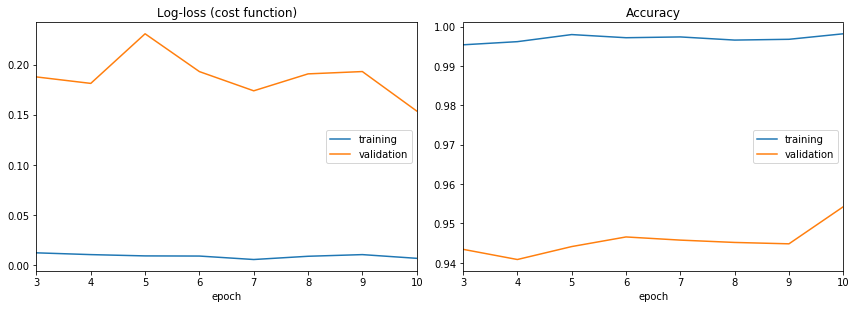

Log-loss (cost function):
training   (min:    0.005, max:    0.028, cur:    0.006)
validation (min:    0.154, max:    0.242, cur:    0.154)

Accuracy:
training   (min:    0.990, max:    0.998, cur:    0.998)
validation (min:    0.935, max:    0.954, cur:    0.954)


In [0]:
from livelossplot.keras import PlotLossesCallback
history=model.fit_generator(train_generator,
                         steps_per_epoch = 500,
                         epochs = 10,
                         validation_data=validation_generator,
                         validation_steps=100,
                         callbacks=[PlotLossesCallback(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)